#Regression Models:

We need an output which predicts continuous value using independent values. The best model for this would be linear regression model. Here I have discussed Linear Regression. Some of them are:
1. Linear Regression : If you want to predict continuous values (Numerical data)
2. Poisson Regression: If you want to predict discrete values (Numerical Data)
3. Cox Model: If you want to predict survivability of a certain person or how long certain product works.
4. Logistic Regression : If you want to predict bionomial values like yes or no, 1 or 0.

There can also be Lasso Regression, Ordinal Regression(Likert Data), etc.

Here I have only discussed Linear Regression which can be of Two Types considering if you use one(x) or multiple independent values to predict an outcome(y)

1. Linear Regression with Single x-value:

      y = bx + bo + E.

      bo = intercept

      b = reg.coeff (in straight line it would simply mean slope)

      y = response variable

      x = regressor variable

      E = random error component


2. Linear Regression with multiple independent values:

    y = b1x1+ b2x2 + b3x3 + b4x4 + ......bnxn + b + E

    If you need more regression analysis details, you could follow this video:

    https://www.youtube.com/watch?v=MXTsSXIa4i0&ab_channel=nptelhrd
    
    It is just something that helped me understand the concepts clearly.




In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [ ]:
data = {"Area" : [1500, 2500, 3500, 4500, 0, 600, 700],
        "Price" : [30, 20, 60, 60, 0, 6, 80]}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('datafile.csv', index=False)

df  = pd.read_csv('datafile.csv')


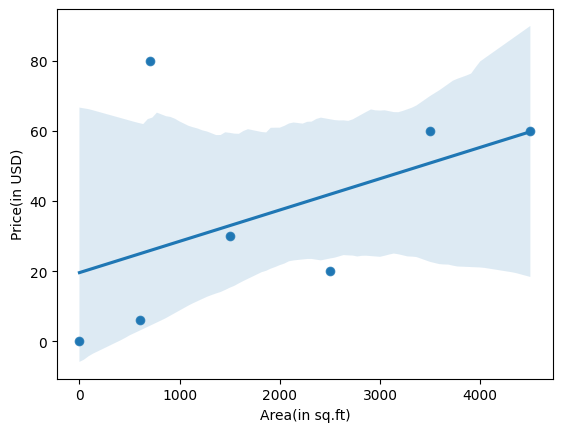

In [ ]:
# Visualization of data

y = sns.scatterplot(x = 'Area', y = 'Price', data = df)
x = sns.regplot(x = 'Area', y = 'Price', data = df)
plt.xlabel('Area(in sq.ft)')
plt.ylabel('Price(in USD)')
plt.show(x,y)

In [ ]:

# Fitting the model
reg = linear_model.LinearRegression()
reg.fit(df[["Area"]],df.Price) #fit means to train x-data

LinearRegression()

In [ ]:
reg.predict([[50]]) #predict using new datapoiunt

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.03524039])

In [ ]:
reg.coef_

array([0.00893848])

In [ ]:
reg.intercept_

19.588316388075132

In [ ]:
datam = {'Area' : [1000, 600, 90, 989, 9090]} #Check using new dataset using regression model
dl = pd.DataFrame(datam)
c = reg.predict(dl)

In [ ]:
dl['Price'] = c
dl.head()

,Area,Price
0,1000,28.526796
1,600,24.951404
2,90,20.392780
3,989,28.428473
4,9090,100.839100


In [ ]:
# Practice from youtube reference
c = pd.read_csv('canada_per_capita_income.csv')
c.head()

,year,capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
rl = linear_model.LinearRegression()
rl.fit(c[['year']],c.capita_income)

LinearRegression()

In [ ]:
print('rl.intercept', rl.intercept_)
print('rl.coef', rl.coef_)
print(rl.predict([[1955]]))

rl.intercept -1632210.7578554575
rl.coef [828.46507522]
[-12561.53579506]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Linear Regression Using Multiple Variables

y = y0 + by1 + by2 + ......

In [ ]:
crl = pd.read_csv('homeprices.csv')
crl.head()
#using median to fillna value of bedroom

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
# Preprocessing data
import math

n = crl.bedrooms.median()
crl = crl.fillna(n)

In [ ]:
model = linear_model.LinearRegression()
model.fit(crl[['area','bedrooms','age']],crl.price)
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
prl = pd.read_csv('hiring.csv')
prl.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [ ]:
# Library to convert one, two, three in dataset to numerical values 1, 2,3,...
! pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=11f8c8db4f2422c725880913a2bc4417d1d1d5c56082f47eaa817d5a9c4bc246
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
# prompt: use word2number library to fill na value in dataset # w2n converts word in numbers like zero to 0

from word2number import w2n

# Fill NaN values in 'experience' column using word2number
prl.experience = prl.experience.fillna("zero")
prl.experience = prl.experience.apply(w2n.word_to_num)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [ ]:
prl = pd.read_csv('hiring.csv')

In [ ]:
prl.experience = prl.experience.fillna('zero')

In [ ]:
prl['experience']= prl.experience.apply(w2n.word_to_num)
prl.head()


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
